In [144]:
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [145]:
tree = ET.parse('offers.xml')
root = tree.getroot()

shop = root.find('shop')
offers = shop.findall('offers/offer')

products = []
for offer in offers:
    product = {
        'id': offer.get('id'),
        'name': offer.find('name').text,
        'price': float(offer.find('price').text),
        'vendor': offer.find('vendor').text,
    }
    products.append(product)

In [146]:
# Генерация данных о продажах
np.random.seed(int(time()))
sales_data = {}
for product in products:
    mean = np.random.uniform(50, 200)
    std = np.random.uniform(10, 30)
    sales = np.random.normal(mean, std, 12)
    sales = np.clip(sales, 0, None)
    sales_data[product['id']] = sales

In [147]:
# Агрегация данных (общие продажи по всем товарам)
average_sales = np.mean([sales for sales in sales_data.values()], axis=0)

# Подготовка данных для модели
X = np.arange(1, 13).reshape(-1, 1)
y = average_sales

# Обучение модели
model = LinearRegression().fit(X, y)
next_month = np.array([[13]])
forecast = model.predict(next_month)

# Прогноз на следующий месяц для всех товаров
y_pred = model.predict(X)



In [148]:
# Оценка качества модели
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Вывод метрик
print(f"Общий прогноз на следующий месяц: {forecast[0]:.1f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Общий прогноз на следующий месяц: 140.1
MSE: 52.13
MAE: 6.39
R²: 0.04


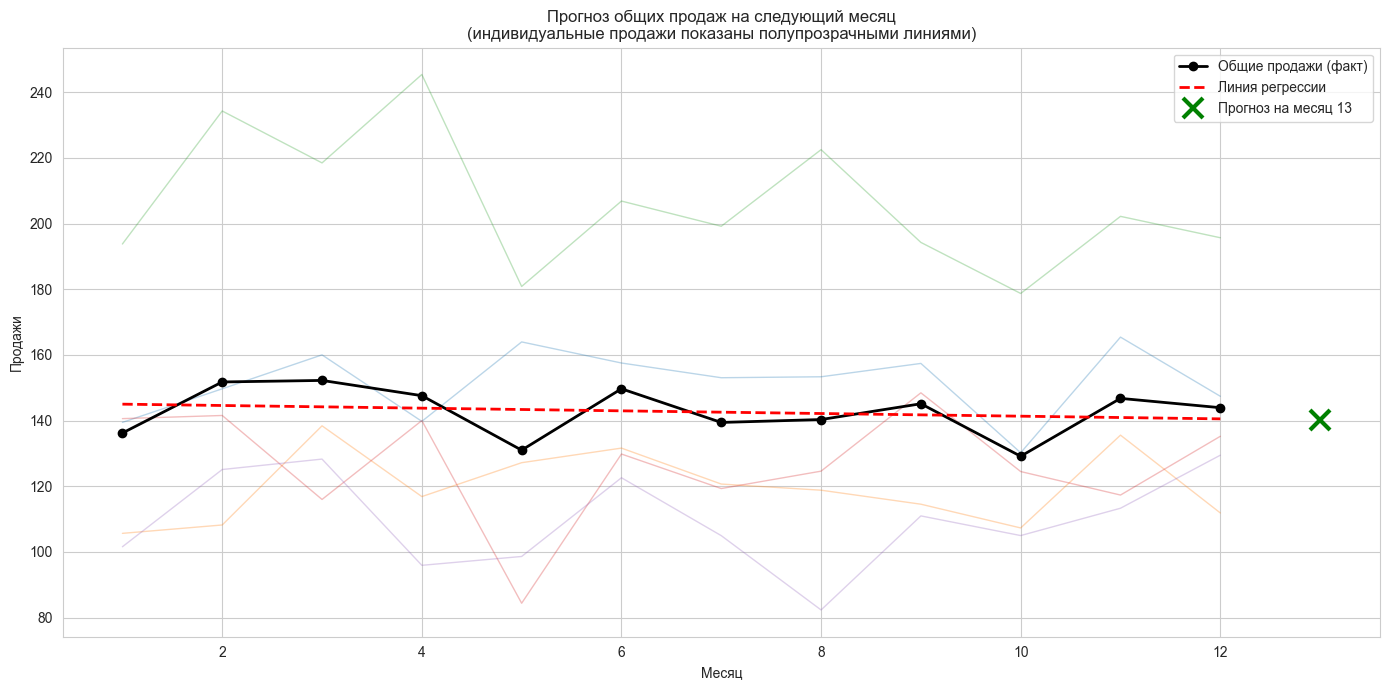

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
months = np.arange(1, 13)
next_month_num = 13

# Отображение индивидуальных продаж (фоном)
for product in products:
    sales = sales_data[product['id']]
    plt.plot(months, sales, alpha=0.3, linewidth=1)

# Отображение общих продаж и прогноза
plt.plot(months, average_sales, 'ko-', linewidth=2, label='Средние продажи (факт)')
plt.plot(months, y_pred, 'r--', linewidth=2, label='Линия регрессии')
plt.plot(next_month_num, forecast, 'gx', markersize=15, markeredgewidth=3, label=f'Прогноз на месяц {next_month_num}')

plt.title('Прогноз общих продаж на следующий месяц\n(индивидуальные продажи показаны полупрозрачными линиями)')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()